# Import and Data Retrieval

In [0]:
%%time
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt


CPU times: user 660 ms, sys: 329 ms, total: 989 ms
Wall time: 1.43 s


In [0]:
#read data in from CSV to pandas dataframe
data = pd.read_csv('https://raw.githubusercontent.com/cspowell1225/dataExplorationAug2019/master/College%20Football%20Offensive%20Stats%20-%20Data.csv?token=AIO5NI5AIPNGQMIGRUPDMR2533SVA')

In [0]:
# Check the first row in the dataframe is as expected
data.head(1)

,Rk,School,G,Pts,PassingCmp,PassingAtt,PassingPct,PassingYds,PassingTD,RushingAtt,RushingYds,RushingAvg,RushingTD,TotalOffensePlays,TotalOffenseYds,TotalOffenseAvg,FirstDownsPass,FirstDownsRush,FirstDownsPen,FirstDownsTot,PenaltiesNo,PenaltiesYds,TurnoversFum,TurnoversInt,TurnoversTot
0,1,Ohio State,11,49.4,18.7,27.3,68.7,248.3,3.6,47.7,282.7,5.9,3.0,75.0,531.0,7.1,11.6,14.6,2.2,28.5,5.6,53.4,1.0,0.1,1.1


#Single Feature Linear Model
Goal: Predict points scored on other features


In [0]:
# sns.pairplot(data)

In [0]:
copy = data.copy()
copy = copy.drop(['Rk', 'School', 'G'], axis=1)

In [0]:

train, test = train_test_split(copy, test_size=0.2)

best feature: TotalOffenseYds * TotalOffenseYds
R-squared for model with 1 feature1:  0.8401354031308674
formula_string=  Pts~TotalOffenseYds * TotalOffenseYds


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Pts   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     542.3
Date:                Wed, 27 Nov 2019   Prob (F-statistic):           1.28e-42
Time:                        21:03:29   Log-Likelihood:                -262.83
No. Observations:                 104   AIC:                             529.7
Df Residuals:                     102   BIC:                             534.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -14.0732      1.871     -7.524      0.000     -17.783     -10.363
TotalOffenseYds     0.1070      0.005     23.287      0.000       0.098       0.116
==============================================================================
Omnibus:                        4.011   Durbin-Watson:                   2.682
Prob(Omnibus):                  0.135   Jarque-Bera (JB):                3.866
Skew:                           0.471   Prob(JB):                        0.145
Kurtosis:                       2.925   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

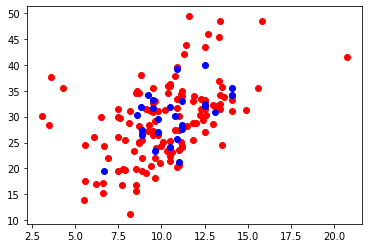

In [0]:
features = list(train.columns.values)
features.remove('Pts')
best_var = ""
best_rsquared_adj = 0.001
rsquared_adj_array = {}
simple_features = ['FirstDownsPass']

for feature in features:
  feature2 = feature
  formula_string = 'Pts~' + feature + ' + ' + feature2
  fss_model1 = smf.ols(formula = formula_string, data=train).fit()
  rsquared_adj_array[feature] = fss_model1.rsquared_adj
  if fss_model1.rsquared_adj > best_rsquared_adj:
    best_rsquared_adj = fss_model1.rsquared_adj
    best_var = feature + ' * ' + feature2

print('best feature: ' + best_var)
previous_k = ' + ' + best_var
# features.remove(best_var)
formula_string = 'Pts~' + best_var
fss_model1 = smf.ols(formula = formula_string, data=train).fit()
print("R-squared for model with 1 feature1: ", fss_model1.rsquared_adj)
# graph to display
plt.plot(data.FirstDownsPass, data.Pts, 'ro')
prediction = fss_model1.predict(test)
plt.plot(test.FirstDownsPass, prediction, 'bo')
print('formula_string= ', formula_string)
fss_model1.summary()

In [0]:
mean = data.TotalOffenseYds.mean()
std = np.std(data.TotalOffenseYds)
print('standard = ' + str(std))
print('mean = ' + str(mean))

standard = 61.96246412907371
mean = 403.9107692307694


In [0]:
# for i in rsquared_adj_array:
#   plt.plot(rsquared_adj_array[i], 'ro', [i])
rsquared_adj_array

{'FirstDownsPass': 0.24176662843742458,
 'FirstDownsPen': 0.003207850626385178,
 'FirstDownsRush': 0.19848007434631765,
 'FirstDownsTot': 0.7642224066620245,
 'PassingAtt': -0.002239411949850112,
 'PassingCmp': 0.06773210158682463,
 'PassingPct': 0.327711999545385,
 'PassingTD': 0.578409648934312,
 'PassingYds': 0.29376514653636887,
 'PenaltiesNo': -0.007141232095429162,
 'PenaltiesYds': 0.00908420809813848,
 'RushingAtt': 0.027282957737984614,
 'RushingAvg': 0.4217481779107908,
 'RushingTD': 0.4452925170709229,
 'RushingYds': 0.22688040221251748,
 'TotalOffenseAvg': 0.7977347817143113,
 'TotalOffensePlays': 0.1699098769555747,
 'TotalOffenseYds': 0.8401354031308674,
 'TurnoversFum': -0.007494347755535591,
 'TurnoversInt': 0.19187126171982427,
 'TurnoversTot': 0.12313772144118595}



# <h1>Can you simply use correlation for subset selection?</h1>


In [0]:
print(np.corrcoef(copy.Pts, copy.TotalOffenseYds))

[[1.        0.9026205]
 [0.9026205 1.       ]]


In [0]:
coef_dict = {}
for i in features:
  coef_dict[i] = np.corrcoef(copy.Pts, copy[i])[1][0]
coef_dict

{'FirstDownsPass': 0.4692660330314996,
 'FirstDownsPen': 0.06053345510751851,
 'FirstDownsRush': 0.4687011313042761,
 'FirstDownsTot': 0.8432682810548222,
 'PassingAtt': 0.04586413769706773,
 'PassingCmp': 0.24864950352998286,
 'PassingPct': 0.5711341078006945,
 'PassingTD': 0.731306596508961,
 'PassingYds': 0.5140254434828901,
 'PenaltiesNo': 0.03416376995366363,
 'PenaltiesYds': 0.11740313201470895,
 'RushingAtt': 0.20132432024785424,
 'RushingAvg': 0.6425676492173229,
 'RushingTD': 0.6744194524254494,
 'RushingYds': 0.4957452752873938,
 'TotalOffenseAvg': 0.8815761673556695,
 'TotalOffensePlays': 0.3509430601517512,
 'TurnoversFum': -0.02324965127236634,
 'TurnoversInt': -0.4285287694286239,
 'TurnoversTot': -0.3495236471469557}

It appears that the highest feature does also have the highest correlation. Will that continue with two features?

# Kris: Continuing Forward Subset Selection 2 Features 

In [0]:
previous_k

' + TotalOffenseYds'

In [0]:

best_rsquared_adj = 0.001
for feature in features:
    formula_string = 'Pts~' + feature + previous_k

# rsquared_adj_array = {}
# for i in features:
#   formula_string = 'Pts~' + i + previous_k
#   fss_model2 = smf.ols(formula = formula_string, data=train).fit()
#   rsquared_adj_array[i] = fss_model2.rsquared_adj
#   if fss_model2.rsquared_adj > best_rsquared_adj:
#     best_rsquared_adj = fss_model2.rsquared_adj
#     best_var = i

# print(best_var)
# previous_k = ' + ' + best_var
# features.remove(best_var)
# formula_string = 'Pts~' + best_var
# fss_model2 = smf.ols(formula = formula_string, data=train).fit()
# print("R-squared for model with 2 features: ", fss_model2.rsquared_adj)
# plt.plot(data.TotalOffenseYds, data.Pts, 'ro')
# prediction = fss_model2.predict(test)
# plt.plot(prediction, 'bo')
# fss_model2.summary()

#Greg: Best two features
-Greg, try using %%time to keep track of how long it takes. All you have to do is have %%time at the top of the cell and when it is run it will display the elapsed time. 

In [0]:
%%time